<a href="https://colab.research.google.com/github/Lucaserafim00/SELECIONAR-FEICOES/blob/main/selecionar_feicao_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DESENVOLVIDO POR LUCAS SERAFIM
[linkedin](www.linkedin.com/in/lucas-serafim-da-silva) | [Github](https://github.com/Lucaserafim00)

In [ ]:
#Importando as bibliotecas que serão utilizadas
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import matplotlib.pyplot as plt

 [Baixe a Malha de Setores Censitários do IBGE (2022) AQUI](https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/26565-malhas-de-setores-censitarios-divisoes-intramunicipais.html)

In [ ]:
#Importando shapefile de Malha de Setores Censitários preliminares 2022 (IBGE)

shapefile_path = '/content/drive/MyDrive/SHP/BR_Malha_Preliminar_2022.shp'

Antes de criar o geodataframe, monte o drive no google Colab ou import o arquivo e copue seu caminho, substituindo o caminho original

In [ ]:
#Criado o geodataframe - Bom, isso pode demorar...
gdf = gpd.read_file(shapefile_path)

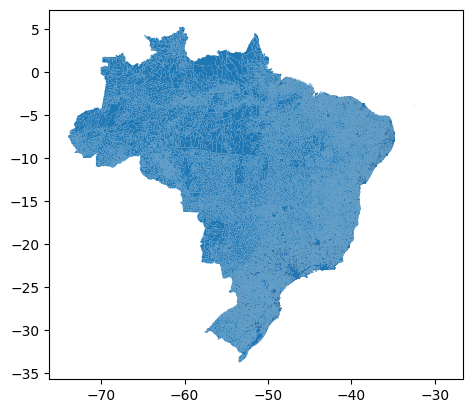

In [ ]:
#Você pode vizualizar todos os setores censitários do Brasil
#se estiver apressado, pule essa etapa

gdf.plot()
plt.show()

Abaixo, será selecionado um Setor Censitário aleatoriamente  e a projeção será alterada para Sirgas 2000

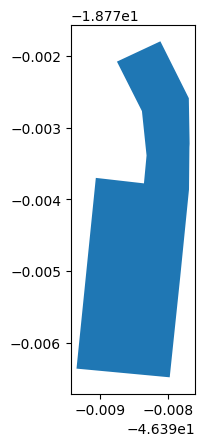

In [ ]:
feicao_aleatoria = gdf.sample(n=1)

feicao_aleatoria = feicao_aleatoria.to_crs(epsg=4674)

#Vamos Visualiza-lo?
feicao_aleatoria.plot()
plt.show()

In [ ]:
feicao_aleatoria

,CD_SETOR,AREA_KM2,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,...,NM_MICRO,CD_MESO,NM_MESO,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_CONCURB,NM_CONCURB,geometry
180414,313750205000055P,0.058226,3,Sudeste,31,Minas Gerais,3137502,Lagoa Formosa,313750205,Lagoa Formosa,...,Patos de Minas,3105,Triângulo Mineiro/Alto Paranaíba,310062,Patos de Minas,3112,Patos de Minas,None,None,"POLYGON ((-46.39768 -18.77322, -46.39768 -18.7..."


Agora, vamos fazer com que o apareça uma janela que mostre o Setor Censitário, suas informações e a imagem de satélite como mapa base. #Confianoprocesso

NOTA: Talvez seja necessário ajustar o ZOOM na vizualização devido a difença de escala entre os setores censitários.

In [ ]:
centroide = feicao_aleatoria.geometry.centroid
latitude, longitude = centroide.y.values[0], centroide.x.values[0]
mapa = folium.Map(location=[latitude, longitude],
                  tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                  attr='Esri Satellite', zoom_start=16, width='98', height='98%')
folium.GeoJson(
    feicao_aleatoria,
    style_function=lambda feature: {
        'color': 'red',  # Cor da borda
        'weight': 4,     # Espessura da borda
        'fillOpacity': 0  # Sem preenchimento
    },
    highlight_function=lambda x: {'weight': 3, 'color': 'blue'},  # Destaque ao passar o mouse
    tooltip=folium.GeoJsonTooltip(fields=['CD_SETOR', 'AREA_KM2', 'CD_REGIAO', 'NM_REGIAO', 'CD_UF', 'NM_UF', 'CD_MUN', 'NM_MUN', 'CD_DIST', 'NM_DIST', 'CD_SUBDIST'], labels=True)  # Informações de atributos
).add_to(mapa)
mapa

<ipython-input-7-cab8b73ef24b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroide = feicao_aleatoria.geometry.centroid
